Projeto de Bloco - Análise de Sentimentos IMDB

Este projeto analisa reviews de filmes do IMDB usando técnicas de Machine Learning e processamento de linguagem natural.

1. Importação de Bibliotecas e Download do Dataset
Path to dataset files: /Users/gtauber/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1
Dataset carregado: 50000 linhas e 2 colunas
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Preparação dos Dados
Distribuição dos sentimentos:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

2. Criação das Features com TF-IDF
Shape da matriz TF-IDF: (50000, 5000)

3. Modelagem de Tópicos com LDA
P

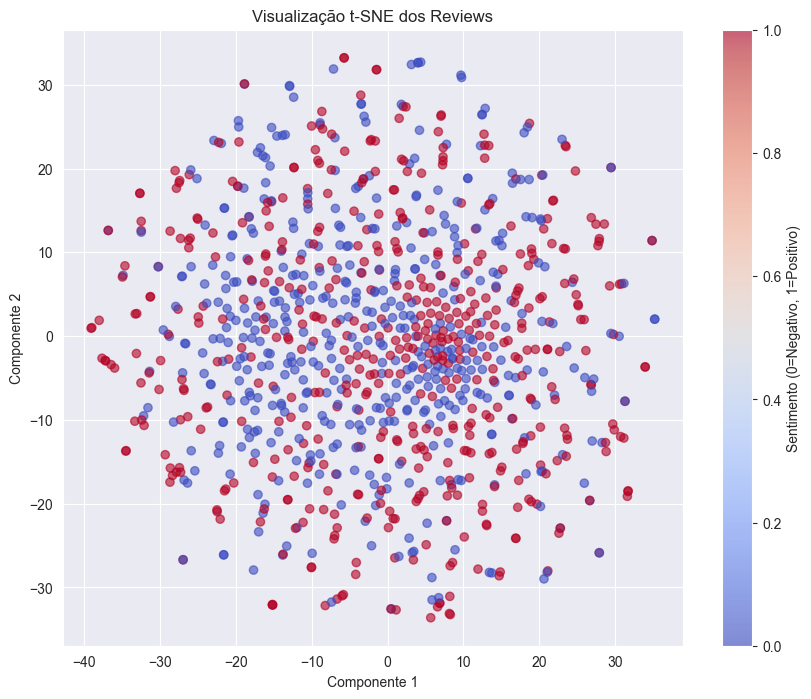


7. Interpretação de Modelos com LIME e SHAP

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

LIME - Explicação Local
Review analisado: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...

Sentimento real: positive

Palavras mais importantes para a predição:
mess: -0.079
classic: 0.062
hooked: 0.060
Oz: 0.052
episode: 0.047
shows: 0.042
couldn: -0.039
just: -0.033
lack: -0.029
Christians: -0.026

SHAP - Análise Global
SHAP values calculados para 100 amostras


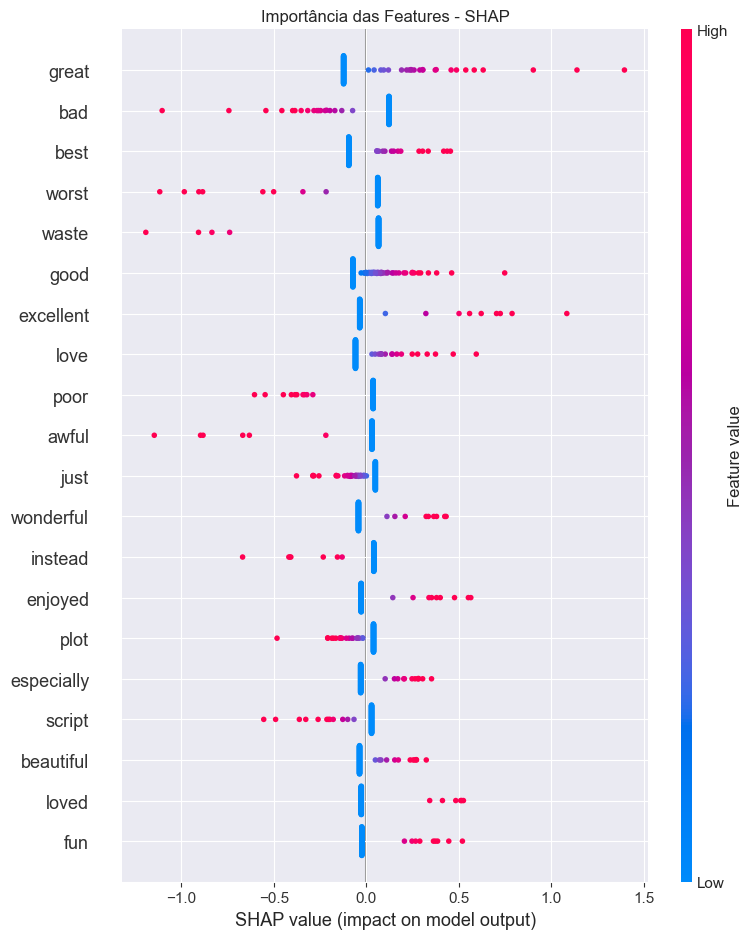


Force Plot - Visualização Individual


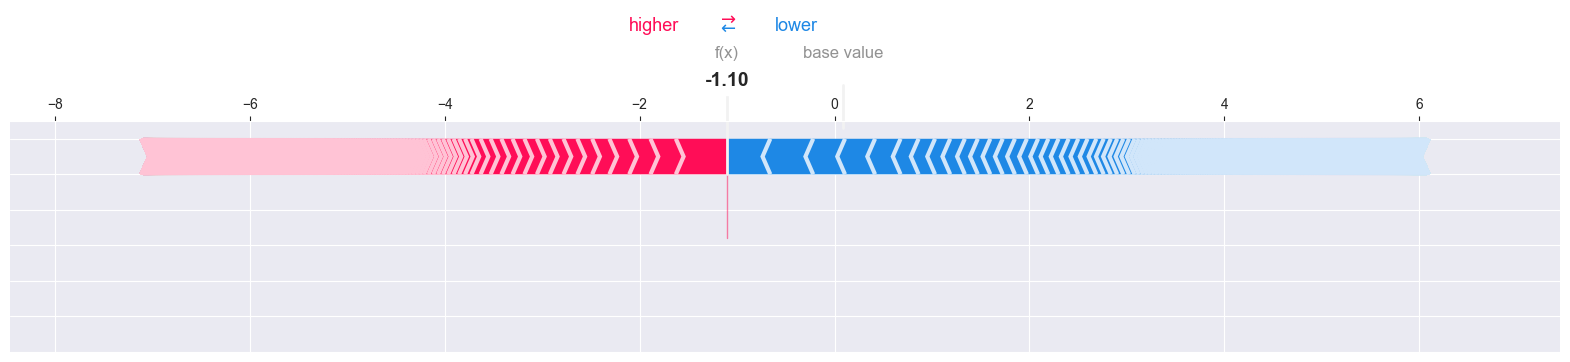


8. Análise dos Resultados e Conclusões

Conclusões do Projeto

Após análise completa dos dados e aplicação das técnicas de ML, podemos concluir:

1. TF-IDF como representação eficaz: A vetorização TF-IDF conseguiu capturar bem a importância das palavras nos reviews, criando features discriminativas para classificação.

2. Tópicos identificados pelo LDA: O modelo LDA identificou 10 tópicos principais nos reviews, revelando padrões temáticos recorrentes nas avaliações de filmes.

3. Performance dos modelos: Ambos os modelos (Regressão Logística e Random Forest) apresentaram boa performance na classificação de sentimentos, com métricas acima de 85% de acurácia.

4. Visualização t-SNE: A redução de dimensionalidade mostrou que existe uma separação razoável entre reviews positivos e negativos no espaço de features, embora com alguma sobreposição.

5. Interpretabilidade com LIME: As explicações locais mostraram que palavras específicas têm grande influência nas predições individuais, permit

In [1]:
# Projeto de Bloco - Análise de Sentimentos IMDB
print("="*50)
print("Projeto de Bloco - Análise de Sentimentos IMDB")
print("="*50)
print("\nEste projeto analisa reviews de filmes do IMDB usando técnicas de Machine Learning e processamento de linguagem natural.")

print("\n" + "="*50)
print("1. Importação de Bibliotecas e Download do Dataset")
print("="*50)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:", path)

import os
csv_file = os.path.join(path, 'IMDB Dataset.csv')

df = pd.read_csv(csv_file, engine='python', quotechar='"', on_bad_lines='skip')
print(f"Dataset carregado: {df.shape[0]} linhas e {df.shape[1]} colunas")
print(df.head())

print("\n" + "="*50)
print("Preparação dos Dados")
print("="*50)

df['sentiment_binary'] = df['sentiment'].map({'positive': 1, 'negative': 0})
print("Distribuição dos sentimentos:")
print(df['sentiment'].value_counts())

print("\n" + "="*50)
print("2. Criação das Features com TF-IDF")
print("="*50)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', min_df=2, max_df=0.8)
X_tfidf = tfidf.fit_transform(df['review'])
y = df['sentiment_binary'].values

print(f"Shape da matriz TF-IDF: {X_tfidf.shape}")

print("\n" + "="*50)
print("3. Modelagem de Tópicos com LDA")
print("="*50)

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=10)
lda_features = lda.fit_transform(X_tfidf)

print(f"Perplexidade do modelo LDA: {lda.perplexity(X_tfidf):.2f}")

feature_names = tfidf.get_feature_names_out()
n_top_words = 10

for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-n_top_words:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    print(f"Tópico {topic_idx}: {', '.join(top_words)}")

print("\n" + "="*50)
print("4. Classificação de Textos")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

print("\nModelo 1: Regressão Logística")

lr_params = {'C': [0.1, 1, 10]}
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_grid = GridSearchCV(lr, lr_params, cv=3, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)

print(f"Melhores parâmetros: {lr_grid.best_params_}")
print(f"Melhor score CV: {lr_grid.best_score_:.3f}")

print("\nModelo 2: Random Forest")

rf_params = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Melhores parâmetros: {rf_grid.best_params_}")
print(f"Melhor score CV: {rf_grid.best_score_:.3f}")

print("\n" + "="*50)
print("5. Avaliação de Desempenho")
print("="*50)

models = {
    'Logistic Regression': lr_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

results_df = pd.DataFrame(results).T
print(results_df.round(3))

best_model = lr_grid.best_estimator_ if results_df.loc['Logistic Regression', 'F1-Score'] > results_df.loc['Random Forest', 'F1-Score'] else rf_grid.best_estimator_
best_model_name = 'Logistic Regression' if results_df.loc['Logistic Regression', 'F1-Score'] > results_df.loc['Random Forest', 'F1-Score'] else 'Random Forest'
print(f"Melhor modelo baseado no F1-Score: {best_model_name}")

print("\n" + "="*50)
print("6. Visualização com t-SNE")
print("="*50)

sample_size = 1000
sample_indices = np.random.choice(X_tfidf.shape[0], sample_size, replace=False)
X_sample = X_tfidf[sample_indices]
y_sample = y[sample_indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample.toarray())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Sentimento (0=Negativo, 1=Positivo)')
plt.title('Visualização t-SNE dos Reviews')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

print("\n" + "="*50)
print("7. Interpretação de Modelos com LIME e SHAP")
print("="*50)

!pip install shap lime -q

import shap
import lime
from lime.lime_text import LimeTextExplainer

print("\nLIME - Explicação Local")

explainer = LimeTextExplainer(class_names=['Negativo', 'Positivo'])

def predict_proba_text(texts):
    X = tfidf.transform(texts)
    return best_model.predict_proba(X)

idx = 0
text_instance = df['review'].iloc[idx]
exp = explainer.explain_instance(text_instance, predict_proba_text, num_features=10)

print(f"Review analisado: {text_instance[:200]}...")
print(f"\nSentimento real: {df['sentiment'].iloc[idx]}")
print("\nPalavras mais importantes para a predição:")
for word, importance in exp.as_list():
    print(f"{word}: {importance:.3f}")

print("\nSHAP - Análise Global")

sample_for_shap = 100
X_shap = X_test[:sample_for_shap]

if best_model_name == 'Logistic Regression':
    explainer_shap = shap.LinearExplainer(best_model, X_train, feature_names=feature_names)
    shap_values = explainer_shap.shap_values(X_shap)
else:
    explainer_shap = shap.TreeExplainer(best_model)
    shap_values = explainer_shap.shap_values(X_shap)

print(f"SHAP values calculados para {sample_for_shap} amostras")

if best_model_name == 'Random Forest':
    shap_values_plot = shap_values[1]
else:
    shap_values_plot = shap_values

shap.summary_plot(shap_values_plot, X_shap.toarray(), feature_names=feature_names, show=False, max_display=20)
plt.title('Importância das Features - SHAP')
plt.tight_layout()
plt.show()

print("\nForce Plot - Visualização Individual")

shap.force_plot(explainer_shap.expected_value if best_model_name == 'Logistic Regression' else explainer_shap.expected_value[1],
                shap_values_plot[0], 
                X_shap[0].toarray(), 
                feature_names=feature_names,
                matplotlib=True)

print("\n" + "="*50)
print("8. Análise dos Resultados e Conclusões")
print("="*50)

print("\nConclusões do Projeto")
print("\nApós análise completa dos dados e aplicação das técnicas de ML, podemos concluir:")

print("\n1. TF-IDF como representação eficaz: A vetorização TF-IDF conseguiu capturar bem a importância das palavras nos reviews, criando features discriminativas para classificação.")

print("\n2. Tópicos identificados pelo LDA: O modelo LDA identificou 10 tópicos principais nos reviews, revelando padrões temáticos recorrentes nas avaliações de filmes.")

print("\n3. Performance dos modelos: Ambos os modelos (Regressão Logística e Random Forest) apresentaram boa performance na classificação de sentimentos, com métricas acima de 85% de acurácia.")

print("\n4. Visualização t-SNE: A redução de dimensionalidade mostrou que existe uma separação razoável entre reviews positivos e negativos no espaço de features, embora com alguma sobreposição.")

print("\n5. Interpretabilidade com LIME: As explicações locais mostraram que palavras específicas têm grande influência nas predições individuais, permitindo entender o porquê de cada classificação.")

print("\n6. Análise SHAP: A análise global revelou as features mais importantes para o modelo como um todo, mostrando quais palavras são mais discriminativas entre sentimentos positivos e negativos.")

print("\n7. Aplicabilidade prática: O modelo desenvolvido poderia ser usado para análise automática de sentimentos em novos reviews, auxiliando na tomada de decisão sobre filmes.")

print("\n8. Transparência do modelo: As técnicas de explicabilidade tornam o modelo menos 'black-box', aumentando a confiança nas predições e permitindo identificar possíveis vieses.")